In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin, exp
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
from numpy import sin, cos, pi
import random
from numpy import loadtxt
from numpy import arange
from functools import partial

%matplotlib inline

#### Ex 1

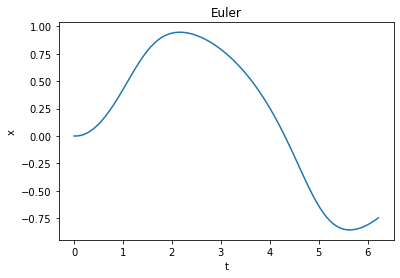

In [14]:
# x' = -x**3 + sin(t)
# x(t=0) = 0
def f(x, t):
    return -x**3 + sin(t)

def euler(start, end, N, x0, f):
    h = (end - start) / N
    x = [x0]
    t = [start]
    for i in range(N-1):
        x.append(x[i] + h * f(x[i], t[i]))
        t.append(t[i] + h)
    return x, t

# Plot
x, t = euler(0, 2 * pi, 100, 0, f)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler')
plt.show()


#### Ex 2

Defining Runge-Kutta methods

In [15]:
def rk4(start, end, N, x0, f):
    #N = int((end - start)/h)
    h = (end - start)/N
    
    xpoints = []
    x = x0
    t = 0
    for _ in range(N):
        t += h
        xpoints.append(x)
        k1 = h*f(x, t)
        k2 = h*f(x + k1/2, t + h/2)
        k3 = h*f(x + k2/2, t + h/2)
        k4 = h*f(x + k3, t + h)
        x += (k1 + 2*k2 + 2*k3 + k4)/6
    
    return np.linspace(start, end, N), xpoints

def rk3(start, end, N, x0, f):
    h = (end - start)/N
    xpoints = []
    x = x0
    t = 0
    for _ in range(N):
        t += h
        xpoints.append(x)
        k1 = h*f(x, t)
        k2 = h*f(x + k1/2, t + h/2)
        k3 = h*f(x + k2, t + h)
        x += (k1 + 2*k2 + k3)/6
    
    return np.linspace(start, end, N), xpoints


def rk2(start, end, N, x0, f):
    h = (end - start)/N
    xpoints = []
    x = x0
    t = 0
    for _ in range(N):
        t += h
        xpoints.append(x)
        k1 = h*f(x, t)
        k2 = h*f(x + k1, t + h)
        x += (k1 + k2)/2
    
    return np.linspace(start, end, N), xpoints


In [16]:
# dx/dt = -x**3 + sin(t)
# x(t=0) = 0

def x_derivative(x, t):
    return -x**3 + sin(t)

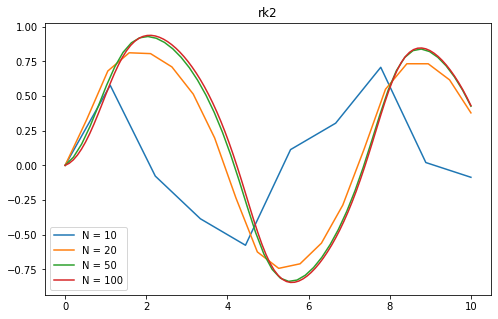

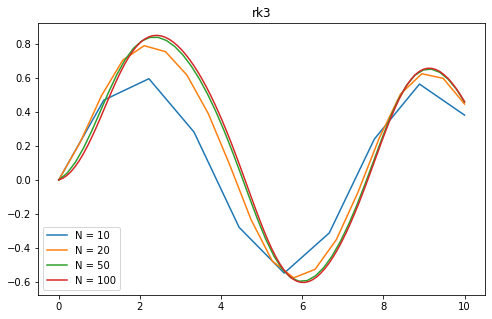

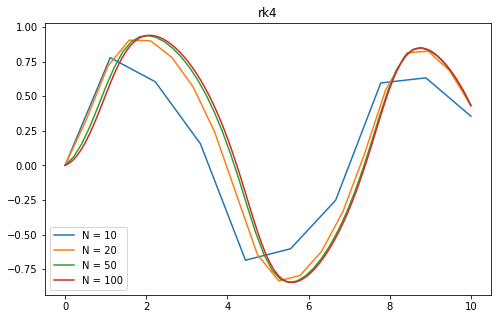

In [17]:
plt.figure(figsize=(8,5))
for N in [10, 20, 50, 100]:
    t, y = rk2(0, 10, N, 0, x_derivative)
    plt.plot(t, y, label=f'N = {N}')
plt.title("rk2")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for N in [10, 20, 50, 100]:
    t, y = rk3(0, 10, N, 0, x_derivative)
    plt.plot(t, y, label=f'N = {N}')
plt.title("rk3")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for N in [10, 20, 50, 100]:
    t, y = rk4(0, 10, N, 0, x_derivative)
    plt.plot(t, y, label=f'N = {N}')
plt.title("rk4")
plt.legend()
plt.show()


#### Ex 3

#### Ex 4

##### a)

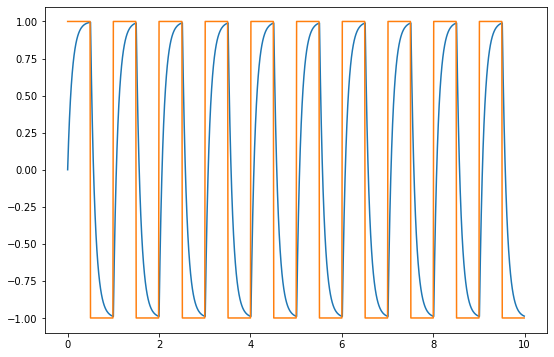

In [18]:
# Podemos tratar dx/dt como sendo v e dx2/dx2 = v'
# Assim transformamos 2º ordem para 1º ordem

def vin(t):
    if int(2*t) % 2 == 0:
        return 1
    else:
        return -1

def f(vout, t, RC=0.1):
    return (1/RC)*(vin(t) - vout)

# Defininf variables
start = 0
stop = 10
x0 = 0
N = 1000

# Euler calcula automaticamente o passo h
y, t = euler(start, stop, N, x0, f)

plt.figure(figsize=(9,6))
plt.plot(t, y, label="Vout")
plt.plot(t, [vin(i) for i in t], label="Vin")
plt.show()

##### b)

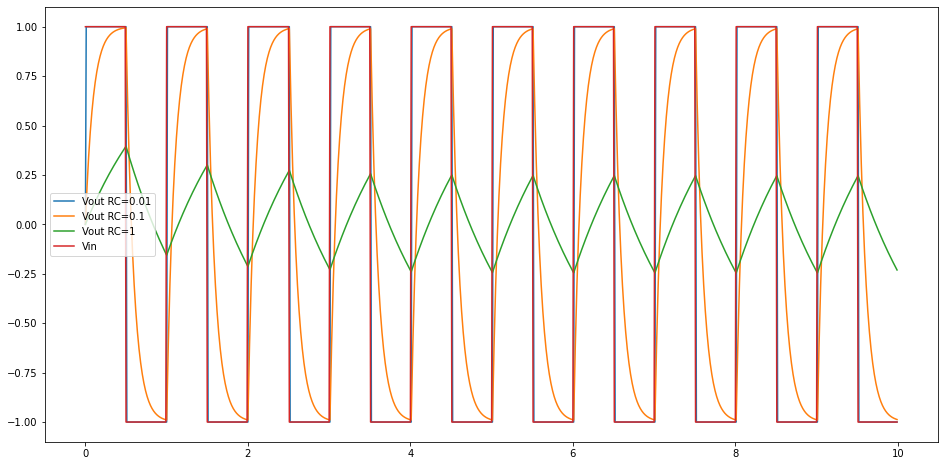

In [20]:
N = 1000 # ~passo

plt.figure(figsize=(16,8))
for RC in [0.01, 0.1, 1]:
    y, t = euler(start, stop, N, x0, partial(f, RC=RC))
    plt.plot(t, y, label=f"Vout RC={RC}")

plt.plot(t, [vin(i) for i in t], label="Vin")
plt.legend()
plt.show()

#### Ex 5

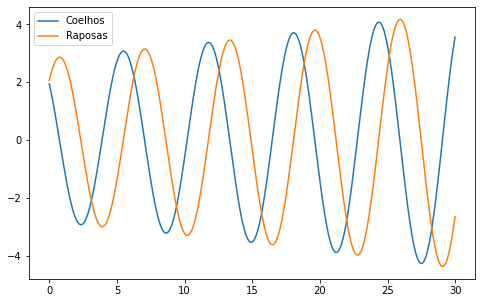

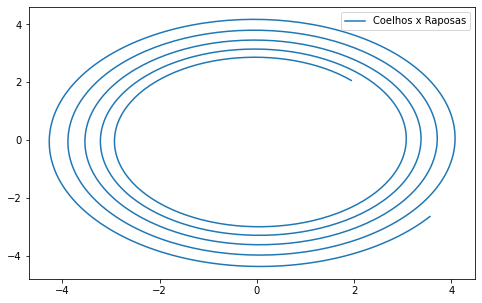

In [10]:
a = 0
b = 30
N = 1000
h = (b-a)/N

tpoints = np.arange(a, b, h)
coelhos = []
raposas = []

r = np.array([2, 2]) # Cond. inicial

for t in tpoints:
    r = r + h*np.array([-r[1], r[0]])
    coelhos.append(r[0])
    raposas.append(r[1])

plt.figure(figsize=(8,5))
plt.plot(tpoints, coelhos, label="Coelhos")
plt.plot(tpoints, raposas, label="Raposas")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(coelhos, raposas, label="Coelhos x Raposas")
plt.legend()
plt.show()

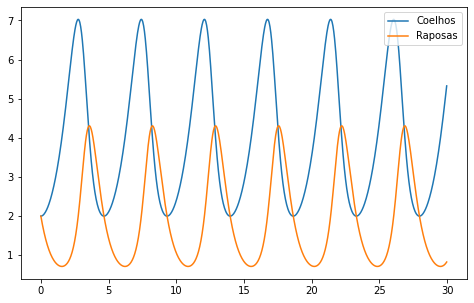

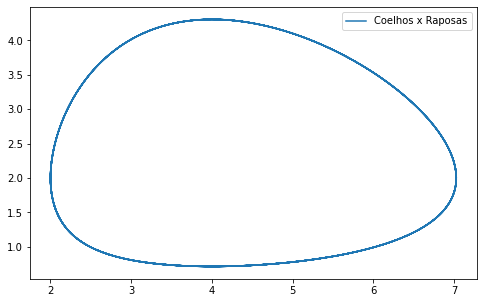

In [11]:
a = 0.0
b = 30.0
N = 1000.0
h = (b-a)/N

tpoints = np.arange(a, b, h)
coelhos = []
raposas = []

r = np.array([2, 2], dtype=float) # Cond. inicial

def f(r):
    x = r[0]
    y = r[1]
    fx = x - 0.5*x*y
    fy = 0.5*x*y - 2*y
    return np.array([fx, fy], dtype=float)


for t in tpoints:
    coelhos.append(r[0])
    raposas.append(r[1])
    k0 = h*f(r)
    k1 = h*f(r + k0/2)
    k2 = h*f(r + 2*k1 - k0)
    r += (k0 + 4.0*k1 + k2)/6.0

plt.figure(figsize=(8,5))
plt.plot(tpoints, coelhos, label="Coelhos")
plt.plot(tpoints, raposas, label="Raposas")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(coelhos, raposas, label="Coelhos x Raposas")
plt.legend()
plt.show()

### Ex 6

### Ex 7